<a href="https://colab.research.google.com/github/snowboarderhk/practice/blob/master/titanic_dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#参考にしたサイト　https://www.codexa.net/kaggle-titanic-beginner/

#===== SVM ======


#ライブラリのインポート
import pandas as pd
import numpy as np

#データセット読み込み
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

#train.head()

#データセットのサイズ確認
test_shape = test.shape
train_shape = train.shape
#print(test_shape,train_shape)

#統計量確認
#train.describe() #test.describe()

#----欠損データの確認----
def kesson_table(df):
    null_val = df.isnull().sum() #isnull()は欠損データか否かを返す
    percent = 100* df.isnull().sum()/len(df)
    kesson_table = pd.concat([null_val,percent],axis=1)#concat は連結、引数のaxisは連結方向
    #print(kesson_table)
    kesson_table_ren_columns = kesson_table.rename(
    columns = {0:"欠損数",1:"%"})
    return kesson_table_ren_columns

#kesson_table(train)

#trainの欠損データ前処理(AgeとEmbarked)※Cabinは欠損率が高いため予測モデルに使用しない

#Age の欠損データは平均値を代理として使う
train["Age"]=train["Age"].fillna(train["Age"].mean()) #fillnaはすべてのnanを指定の値に置き換え

#Embarkedの欠損データは最も多いSとする。
train["Embarked"] = train["Embarked"].fillna("S")

#kesson_table(train)

#カテゴリカルなデータを数字に置き換える
train["Sex"][train["Sex"] == "male"] = 0
train["Sex"][train["Sex"] == "female"] = 1
train["Embarked"][train["Embarked"] == "S" ] = 0
train["Embarked"][train["Embarked"] == "C" ] = 1
train["Embarked"][train["Embarked"] == "Q"] = 2
#train.head()

test["Sex"][test["Sex"] == "male"] = 0
test["Sex"][test["Sex"] == "female"] = 1
test["Embarked"][test["Embarked"] == "S"] = 0
test["Embarked"][test["Embarked"] == "C"] = 1
test["Embarked"][test["Embarked"] == "Q"] = 2
#test.head()

#kesson_table(test)

test["Age"] = test["Age"].fillna(test["Age"].mean())
test["Fare"] = test["Fare"].fillna(test["Fare"].mean())
#kesson_table(test)

#trainデータセットを目的変数と説明変数に分ける
target = train["Survived"].values

features_one = train[["Pclass","Age","Sex","Fare", "SibSp", "Parch", "Embarked"]].values
#testデータセットから説明変数の値を取得
test_features = test[["Pclass","Age","Sex","Fare", "SibSp", "Parch", "Embarked"]].values

#正規化を試みる200518
from sklearn import preprocessing
ss = preprocessing.StandardScaler()

features_one_std = ss.fit_transform(features_one)
test_features_std = ss.fit_transform(test_features)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to b

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.layers import Dropout

In [ ]:
#one hot encoding
target_one_hot = np_utils.to_categorical(target)


In [ ]:
# モデルの作成
model = Sequential()
model.add(Dense(5, input_dim=7))    # 入力層7ノード, 隠れ層に4ノード, 全結合
model.add(Activation("relu"))    # 活性化関数はRelu
model.add(Dropout(0.25))
model.add(Dense(5, input_dim=5))
model.add(Dropout(0.25))
model.add(Dense(2)) # 出力層2ノード,全結合
model.add(Activation("sigmoid"))

In [ ]:
model.compile(loss="binary_crossentropy",   # 誤差関数
              optimizer="adam",     # 最適化手法
              metrics=['accuracy'])

In [ ]:
# 訓練
history = model.fit(features_one_std, target_one_hot, nb_epoch=100, batch_size=100) # 学習

Epoch 1/100
822/822 [==============================] - 0s 39us/step - loss: 0.5273 - accuracy: 0.7670
Epoch 2/100
822/822 [==============================] - 0s 25us/step - loss: 0.4999 - accuracy: 0.7853
Epoch 3/100
822/822 [==============================] - 0s 25us/step - loss: 0.5022 - accuracy: 0.7792
Epoch 4/100
822/822 [==============================] - 0s 25us/step - loss: 0.5224 - accuracy: 0.7658
Epoch 5/100
822/822 [==============================] - 0s 24us/step - loss: 0.5048 - accuracy: 0.7713
Epoch 6/100
822/822 [==============================] - 0s 23us/step - loss: 0.5295 - accuracy: 0.7536
Epoch 7/100
822/822 [==============================] - 0s 22us/step - loss: 0.5154 - accuracy: 0.7597
Epoch 8/100
822/822 [==============================] - 0s 25us/step - loss: 0.5299 - accuracy: 0.7603
Epoch 9/100
100/822 [==>...........................] - ETA: 0s - loss: 0.5217 - accuracy: 0.7500

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


822/822 [==============================] - 0s 22us/step - loss: 0.5368 - accuracy: 0.7482
Epoch 10/100
822/822 [==============================] - 0s 28us/step - loss: 0.5233 - accuracy: 0.7646
Epoch 11/100
822/822 [==============================] - 0s 20us/step - loss: 0.5177 - accuracy: 0.7609
Epoch 12/100
822/822 [==============================] - 0s 23us/step - loss: 0.5144 - accuracy: 0.7658
Epoch 13/100
822/822 [==============================] - 0s 24us/step - loss: 0.5265 - accuracy: 0.7640
Epoch 14/100
822/822 [==============================] - 0s 23us/step - loss: 0.5249 - accuracy: 0.7707
Epoch 15/100
822/822 [==============================] - 0s 22us/step - loss: 0.5085 - accuracy: 0.7768
Epoch 16/100
822/822 [==============================] - 0s 26us/step - loss: 0.5100 - accuracy: 0.7755
Epoch 17/100
822/822 [==============================] - 0s 24us/step - loss: 0.5156 - accuracy: 0.7682
Epoch 18/100
822/822 [==============================] - 0s 36us/step - loss: 0.5284 - 

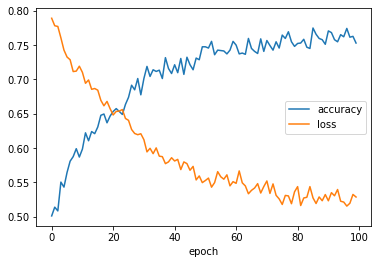

In [ ]:
plt.plot(history.epoch, history.history["accuracy"], label="accuracy")
plt.plot(history.epoch, history.history["loss"], label="loss")
plt.xlabel("epoch")
plt.legend()

In [ ]:
pred = model.predict(test_features_std)

predd = np.argmax(pred, axis=1)

# PassengerIDを取得
PassengerId = np.array(test["PassengerId"]).astype(int)

# my_predictionとPassengerIdをデータフレームへ落とし込む
my_solution = pd.DataFrame(predd,PassengerId,columns = ["Survived"])

# my_tree_one.csvとして出力
my_solution.to_csv("/content/my_dl_one.csv",index_label = ["PassengerId"])